<a href="https://colab.research.google.com/github/A-Belknap/austin_INFO5707_Spring2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [18]:
# Your answer here (code + explanation):

import nltk
import   nltk.data
nltk.download('popular')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.corpus import *
!pip install ftfy
import ftfy
import os

corpus_root = "/content/drive/MyDrive/Lab4/preprocessed_cases[cases_29404]"

corpus = nltk.corpus.reader.plaintext.PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')


print(corpus.words())
#1
#There are 78 categories because there are 78 folders within the corpus

#2
#counts of documents under each category
counts = {}
for dirpath, dirnames, fnames in os.walk(corpus_root, topdown=False):
    counts[dirpath] = len(fnames)
    for d in dirnames:
        key = os.path.join(dirpath, d)
        counts[dirpath] += counts[key]
print(counts)

#3, find the average number of sentences

from __future__ import division
total_lens = 0
for i, sent in enumerate(corpus.sents()):
  total_lens += len(sent)

total_lens 
i
avg_sent_len = total_lens / i
avg_sent_len
avg_sent_len = total_lens / (i+1)
print(avg_sent_len)

#4
#find average number of words
from __future__ import division
total_lens2 = 0
for i, word in enumerate(corpus.words()):
  total_lens2 += len(word)

total_lens2
i
avg_word_len = total_lens2 / i
avg_word_len
avg_word_len = total_lens2 / (i+1)
print(avg_word_len)

#4
filtered_corpus = [word for word in corpus if word not in stopwords.words('english')]







[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

     Missing Values
ge                0
cst               0
tnp               0
twp               0
iap               0
esp               0
arr               0
ms                0
ls                0
as                0
fmi               0
fs                0
fq                0
mq                0
fo                0
mo                0
nf                0
sh                0
ss                0
me                0
tt                0
atd               0
  ge   cst   tnp   twp iap   esp arr         ms ls    as  ...  fq  mq  \
0  F     G  Good  Good  Vg  Good   Y  Unmarried  V  Paid  ...  Um  10   
1  M   OBC    Vg    Vg  Vg    Vg   N  Unmarried  V  Paid  ...  Um  Il   
2  F   OBC  Good  Good  Vg  Good   N  Unmarried  V  Paid  ...  12  10   
3  M  MOBC  Pass  Good  Vg  Good   N  Unmarried  V  Paid  ...  12  Um   
4  M     G  Good  Good  Vg    Vg   N  Unmarried  V  Paid  ...  10  12   

         fo         mo       nf       sh       ss   me       tt      atd  
0    Farmer  Housewife    

ValueError: ignored

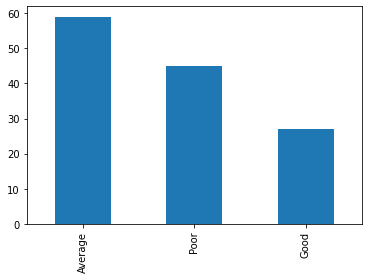

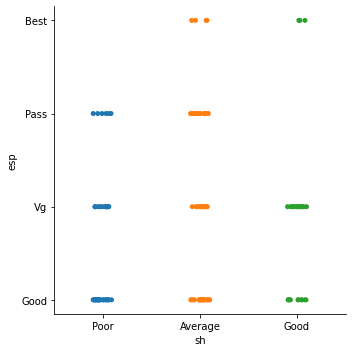

In [17]:
# Your answer here (code + explanation):
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

url_file = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'

df = pd.read_csv(url_file)
print(pd.DataFrame({'Missing Values': df.isna().sum()}))
print(df.head())
print(df.describe())

df['sh'].value_counts().plot(kind = 'bar')

sns.catplot(x = 'sh', y = 'esp', data = df)

#store the correlations as 'corr'
corr = df.corr()

# plot the heatmap

sns.heatmap(data = df.corr())



Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Please list your questions here:
1. What's the average quality of the wine?
2. What's the correlation between fixed acidity and citric acid?
3. What's the correlation between quality and residual sugar?




'''

'\nPlease list your questions here:\n\n\n\n\n\n'

                      Missing Values
fixed acidity                      0
volatile acidity                   0
citric acid                        0
residual sugar                     0
chlorides                          0
free sulfur dioxide                0
total sulfur dioxide               0
density                            0
pH                                 0
sulphates                          0
alcohol                            0
quality                            0
Id                                 0
       fixed acidity  volatile acidity  ...      quality           Id
count    1143.000000       1143.000000  ...  1143.000000  1143.000000
mean        8.311111          0.531339  ...     5.657043   804.969379
std         1.747595          0.179633  ...     0.805824   463.997116
min         4.600000          0.120000  ...     3.000000     0.000000
25%         7.100000          0.392500  ...     5.000000   411.000000
50%         7.900000          0.520000  ...     6.000000   794

Text(0.5, 1.0, 'Wine Correlation')

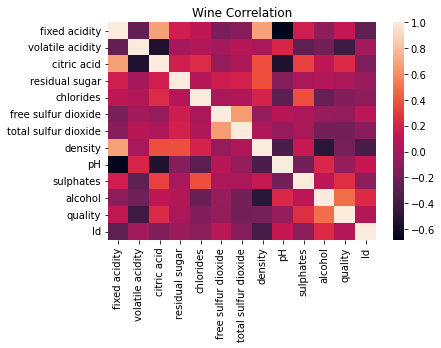

In [ ]:
# You code to answer the three questions (Please add comments in the code):

import pandas as pd
import numpy as np
import seaborn as sns

wine_data = pd.read_csv('/content/drive/MyDrive/Lab4/WineQT.csv')
df.head

#check for any missing values
print(pd.DataFrame({'Missing Values': wine_data.isna().sum()}))

#describe the data to answer question 1
print(wine_data.describe())


#Create a heat map to visualize the correlations and answer questions 2 and 3
sns.heatmap(data = wine_data.corr())
plt.title("Wine Correlation")







